In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('C:/Users/felic/Desktop/파이썬/머신/폐암/survey lung cancer.csv')

In [3]:
print(data)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [4]:
#형변환

In [5]:
from sklearn import preprocessing

In [6]:
le=preprocessing.LabelEncoder()
data['GENDER']=le.fit_transform(data['GENDER']) #남자1 여자0
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER']) #폐암1 아니면0

In [7]:
print(data.head())

   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2               

In [8]:
X = data.drop('LUNG_CANCER', axis = 1)
y = data['LUNG_CANCER']

In [9]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [10]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int32

In [11]:
'''
오버샘플링
'''

'\n오버샘플링\n'

In [12]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size= 0.3,random_state=77)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(216, 15)
(93, 15)
(216,)
(93,)


In [16]:
#LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [18]:
lr=LogisticRegression(random_state=77)
lr.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=77)

In [19]:
print(f"train:",lr.score(X_train,y_train))
print(f'test:', lr.score(X_test,y_test))

train: 0.9398148148148148
test: 0.9139784946236559


In [20]:
test_pred = lr.predict(X_test)

In [21]:
print(f' RMSE score :', np.sqrt(mean_squared_error(y_test, test_pred)))

 RMSE score : 0.2932942300427066


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # model 평가

In [23]:
acc = accuracy_score(y_test, test_pred)
acc  # 0.9666666666666667
con_mat = confusion_matrix(y_test, test_pred)
con_mat
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.93      0.98      0.95        81

    accuracy                           0.91        93
   macro avg       0.84      0.74      0.78        93
weighted avg       0.91      0.91      0.91        93



In [24]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.93      0.98      0.95        81

    accuracy                           0.91        93
   macro avg       0.84      0.74      0.78        93
weighted avg       0.91      0.91      0.91        93



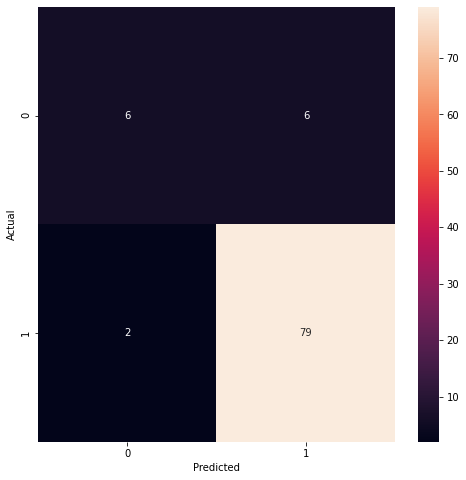

In [25]:
confusion_log=confusion_matrix(y_test,lr.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,test_pred))

In [26]:
'''
암환자 재현률: 98% 
'''

'\n암환자 재현률: 98% \n'

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
print(f"train:",knn.score(X_train,y_train))
print(f'test:', knn.score(X_test,y_test))

train: 0.9027777777777778
test: 0.8924731182795699


In [30]:
test_pred = knn.predict(X_test)
print(f' RMSE score :', np.sqrt(mean_squared_error(y_test, test_pred)))

 RMSE score : 0.32791291789197646


              precision    recall  f1-score   support

           0       0.75      0.25      0.38        12
           1       0.90      0.99      0.94        81

    accuracy                           0.89        93
   macro avg       0.82      0.62      0.66        93
weighted avg       0.88      0.89      0.87        93



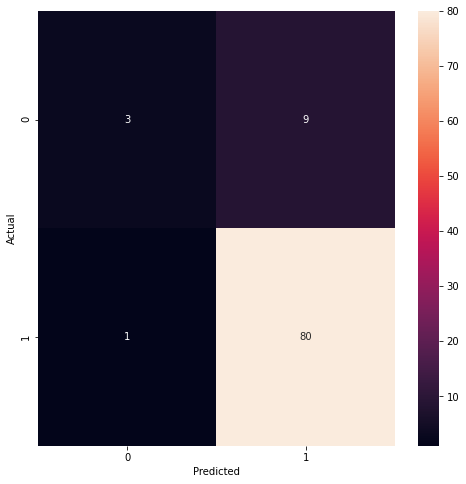

In [31]:
confusion_log=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,test_pred))

In [32]:
'''
GradientBoosting
'''

'\nGradientBoosting\n'

In [33]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestRegressor

In [75]:
gb = GradientBoostingClassifier(
            subsample = 0.05, #과다적합 방지용
            random_state=77
        ).fit(X,y)

In [76]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(random_state=77, subsample=0.05)

In [77]:
print(f"train:",gb.score(X_train,y_train))
print(f'test:', gb.score(X_test,y_test))

train: 0.9120370370370371
test: 0.8924731182795699


In [37]:
test_pred = gb.predict(X_test)
print(f' RMSE score :', np.sqrt(mean_squared_error(y_test, test_pred)))

 RMSE score : 0.2932942300427066


In [38]:
gb_test_pred = gb.predict(X_test)

In [39]:
acc = accuracy_score(y_test, gb_test_pred)
acc  # 0.9666666666666667
con_mat = confusion_matrix(y_test, gb_test_pred)
con_mat
report = classification_report(y_test, gb_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.94      0.96      0.95        81

    accuracy                           0.91        93
   macro avg       0.82      0.77      0.79        93
weighted avg       0.91      0.91      0.91        93



              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.94      0.96      0.95        81

    accuracy                           0.91        93
   macro avg       0.82      0.77      0.79        93
weighted avg       0.91      0.91      0.91        93



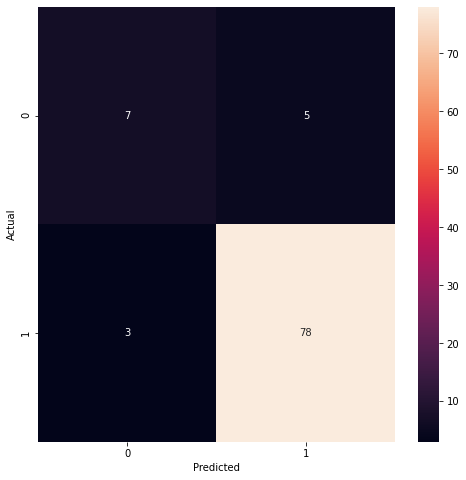

In [40]:
confusion_log=confusion_matrix(y_test,gb.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,test_pred))

In [41]:
'''
암환자 재현률 0.96
'''

'\n암환자 재현률 0.96\n'

In [42]:
'''
xgboost
'''

'\nxgboost\n'

In [43]:
import xgboost as xgb

In [44]:
xgb = xgb.XGBClassifier(
    #objective ='reg:linear',
    #colsample_bytree = 0.3,
    #learning_rate = 1,
    #max_depth = 10,
    #alpha = 10,
    #n_estimators = 10
    ).fit(X,y)

In [45]:
print(f"train:",xgb.score(X_train,y_train))
print(f'test:', xgb.score(X_test,y_test))

train: 1.0
test: 0.989247311827957


In [46]:
test_pred = xgb.predict(X_test)

In [47]:
print(f' RMSE score :', np.sqrt(mean_squared_error(y_test, test_pred)))

 RMSE score : 0.10369516947304253


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # model 평가

In [49]:
acc = accuracy_score(y_test, test_pred)
acc  # 0.9666666666666667
con_mat = confusion_matrix(y_test, test_pred)
con_mat
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.99      1.00      0.99        81

    accuracy                           0.99        93
   macro avg       0.99      0.96      0.98        93
weighted avg       0.99      0.99      0.99        93



              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.99      1.00      0.99        81

    accuracy                           0.99        93
   macro avg       0.99      0.96      0.98        93
weighted avg       0.99      0.99      0.99        93



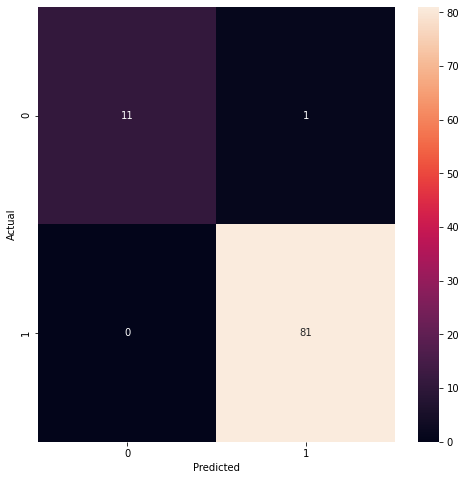

In [50]:
confusion_log=confusion_matrix(y_test,xgb.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,test_pred))

In [51]:
'''
암환자 재현률 1.00
'''

'\n암환자 재현률 1.00\n'

In [52]:
from xgboost import plot_importance

In [53]:
fscore = xgb.get_booster().get_fscore()
fscore

{'GENDER': 51.0,
 'AGE': 228.0,
 'SMOKING': 24.0,
 'YELLOW_FINGERS': 45.0,
 'ANXIETY': 22.0,
 'PEER_PRESSURE': 32.0,
 'CHRONIC DISEASE': 53.0,
 'FATIGUE ': 46.0,
 'ALLERGY ': 35.0,
 'WHEEZING': 16.0,
 'ALCOHOL CONSUMING': 42.0,
 'COUGHING': 41.0,
 'SHORTNESS OF BREATH': 43.0,
 'SWALLOWING DIFFICULTY': 27.0,
 'CHEST PAIN': 34.0}

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

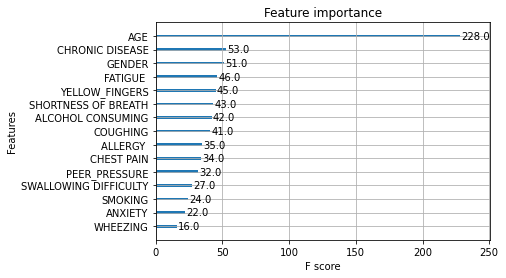

In [54]:
plot_importance(xgb)

In [55]:
'''
결론: xgboost가 가장 분석이 잘된다. 이정도면 굳이 딥러닝으로 안해도 분석이 충분한 수준(0.989247311827957%)
'''

'\n결론: xgboost가 가장 분석이 잘된다. 이정도면 굳이 딥러닝으로 안해도 분석이 충분한 수준(0.989247311827957%)\n'